In [ ]:
!pip install pandas numpy matplotlib scikit-learn keras tensorflow


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd

df = pd.read_csv("Crimes_-_2001_to_Present.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Create 'Day' column
df['Day'] = df['Date'].dt.date

# Group by Day to get crime count
daily_crime = df.groupby('Day').size().reset_index(name='Crime_Count')
daily_crime['Day'] = pd.to_datetime(daily_crime['Day'])
daily_crime.set_index('Day', inplace=True)

# Visual check
daily_crime.tail()


<ipython-input-3-8d852cd7a885>:3: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Crimes_-_2001_to_Present.csv")
<ipython-input-3-8d852cd7a885>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Crime_Count
Day,
2023-07-10,731
2023-07-11,698
2023-07-12,697
2023-07-13,721
2023-07-14,717


In [ ]:
import pandas as pd

df = pd.read_csv("Crimes_-_2001_to_Present.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Create 'Day' column
df['Day'] = df['Date'].dt.date

# Group by Day to get crime count
daily_crime = df.groupby('Day').size().reset_index(name='Crime_Count')
daily_crime['Day'] = pd.to_datetime(daily_crime['Day'])
daily_crime.set_index('Day', inplace=True)

# Visual check
daily_crime.tail()


<ipython-input-4-8d852cd7a885>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Crime_Count
Day,
2023-07-10,731
2023-07-11,698
2023-07-12,697
2023-07-13,721
2023-07-14,717


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_crime[['Crime_Count']])

# Time series generator (30-day lookback)
sequence_length = 30
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=32)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(128, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=25)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - loss: 0.0138
Epoch 2/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - loss: 0.0035
Epoch 3/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - loss: 0.0033
Epoch 4/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - loss: 0.0036
Epoch 5/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - loss: 0.0031
Epoch 6/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - loss: 0.0031
Epoch 7/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - loss: 0.0029
Epoch 8/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - loss: 0.0030
Epoch 9/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.0031
Epoch 10/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 0.0028
Epoch 11/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 0.0027
Epoch 12/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - loss: 0.0028
Epoch 13/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - loss: 0.0028
Epoch 14/25
257/257 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - loss: 0.0029
Epoch 15/25
257/257 ━━━━━━━━━

257/257 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


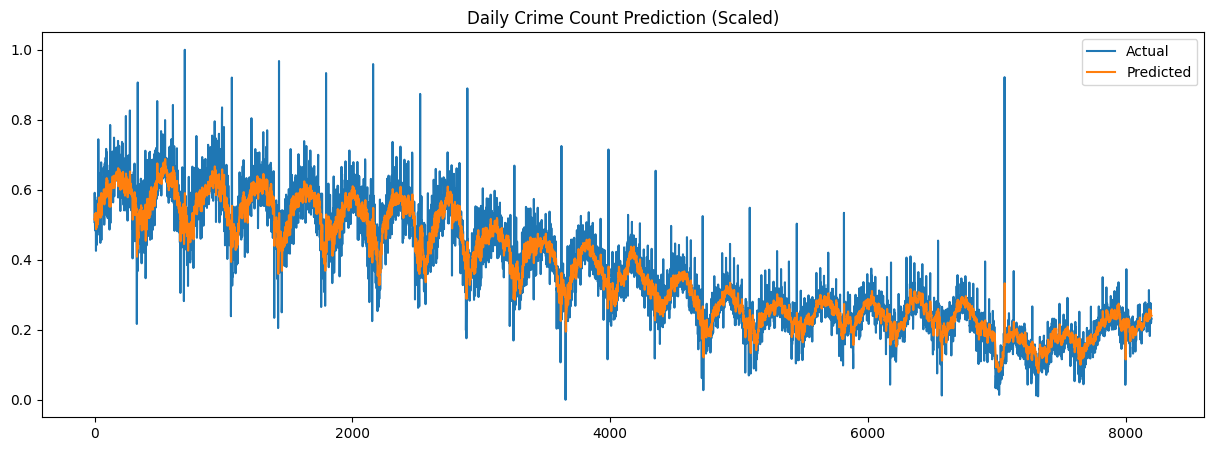

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
pred = model.predict(generator)
actual = scaled_data[sequence_length:]

# Plot
plt.figure(figsize=(15,5))
plt.plot(actual, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.title('Daily Crime Count Prediction (Scaled)')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(actual, pred))
print("RMSE:", rmse)


RMSE: 0.05090823470990097


In [ ]:
# Generate multi-step targets (shifted)
def create_multistep_sequences(data, lookback, steps_ahead):
    X, y = [], []
    for i in range(len(data) - lookback - steps_ahead):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback:i+lookback+steps_ahead])
    return np.array(X), np.array(y)

lookback = 30
steps_ahead = 7
X, y = create_multistep_sequences(scaled_data, lookback, steps_ahead)

# Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
residuals = np.array(y_baseline) - np.array(y_pred_lr)
threshold = 2 * np.std(residuals)
anomalies = np.where(abs(residuals) > threshold)[0]
print(f"Anomalous predictions at indices: {anomalies}")


Anomalous predictions at indices: [  29   37   51   53   90   93  115  116  121  151  200  243  273  274
  295  298  312  327  328  329  333  335  344  349  359  365  380  394
  396  397  401  406  407  408  421  425  429  431  434  439  445  464
  469  477  485  486  516  547  597  608  620  641  662  666  681  693
  694  700  718  725  731  751  759  765  767  772  790  823  830  881
  899  912  932  942  965  969  988  989 1004 1005 1012 1019 1030 1057
 1058 1065 1068 1069 1070 1094 1114 1125 1149 1156 1166 1168 1187 1217
 1268 1309 1339 1371 1383 1393 1394 1397 1417 1418 1423 1424 1425 1431
 1452 1453 1479 1486 1521 1525 1526 1528 1543 1582 1626 1643 1674 1734
 1735 1751 1758 1759 1768 1769 1772 1775 1782 1789 1796 1814 1817 1844
 1845 1855 1864 1869 1871 1901 1915 1916 1920 1947 1977 2039 2042 2099
 2100 2118 2122 2131 2132 2141 2143 2144 2153 2154 2161 2181 2188 2194
 2195 2196 2197 2204 2211 2212 2214 2220 2221 2228 2229 2231 2232 2235
 2258 2270 2281 2312 2342 2373 2391 2395 24

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Model (same as before, updated input shape if needed)
model.fit(X_train, y_train, epochs=25)

# Predict
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Epoch 1/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.0033
Epoch 2/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - loss: 0.0034
Epoch 3/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - loss: 0.0033
Epoch 4/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - loss: 0.0033
Epoch 5/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - loss: 0.0033
Epoch 6/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - loss: 0.0033
Epoch 7/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - loss: 0.0033
Epoch 8/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 0.0032
Epoch 9/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - loss: 0.0033
Epoch 10/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0033
Epoch 11/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - loss: 0.0032
Epoch 12/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - loss: 0.0033
Epoch 13/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0033
Epoch 14/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - loss: 0.0032
Epoch 15/25
205/205 ━━━━━━━━━

ValueError: Found array with dim 3. None expected <= 2.

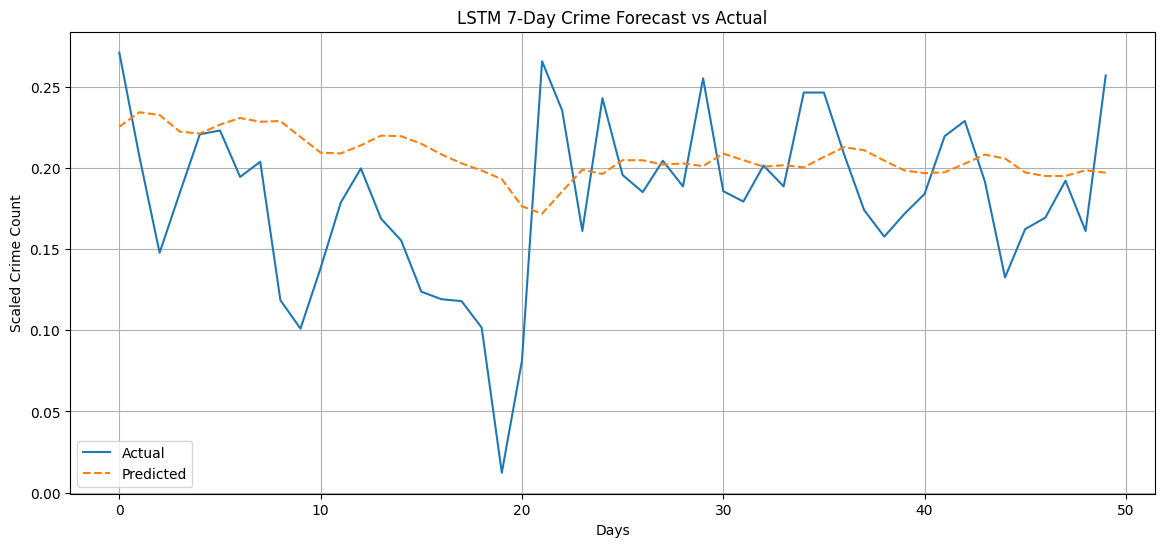

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test[:50, 0], label="Actual")
plt.plot(y_pred[:50, 0], label="Predicted", linestyle='--')
plt.title("LSTM 7-Day Crime Forecast vs Actual")
plt.xlabel("Days")
plt.ylabel("Scaled Crime Count")
plt.legend()
plt.grid(True)
plt.show()


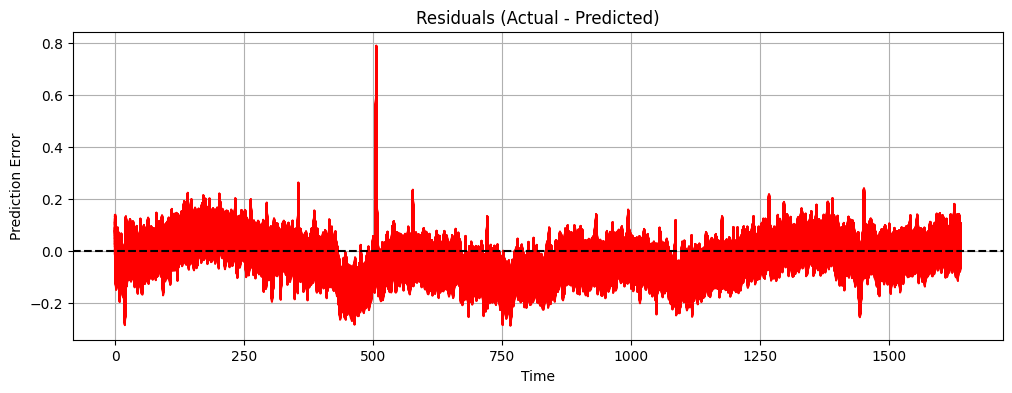

In [ ]:
residuals = y_test[:, 0] - y_pred[:, 0]
plt.figure(figsize=(12,4))
plt.plot(residuals, color='red')
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Time")
plt.ylabel("Prediction Error")
plt.grid(True)
plt.show()


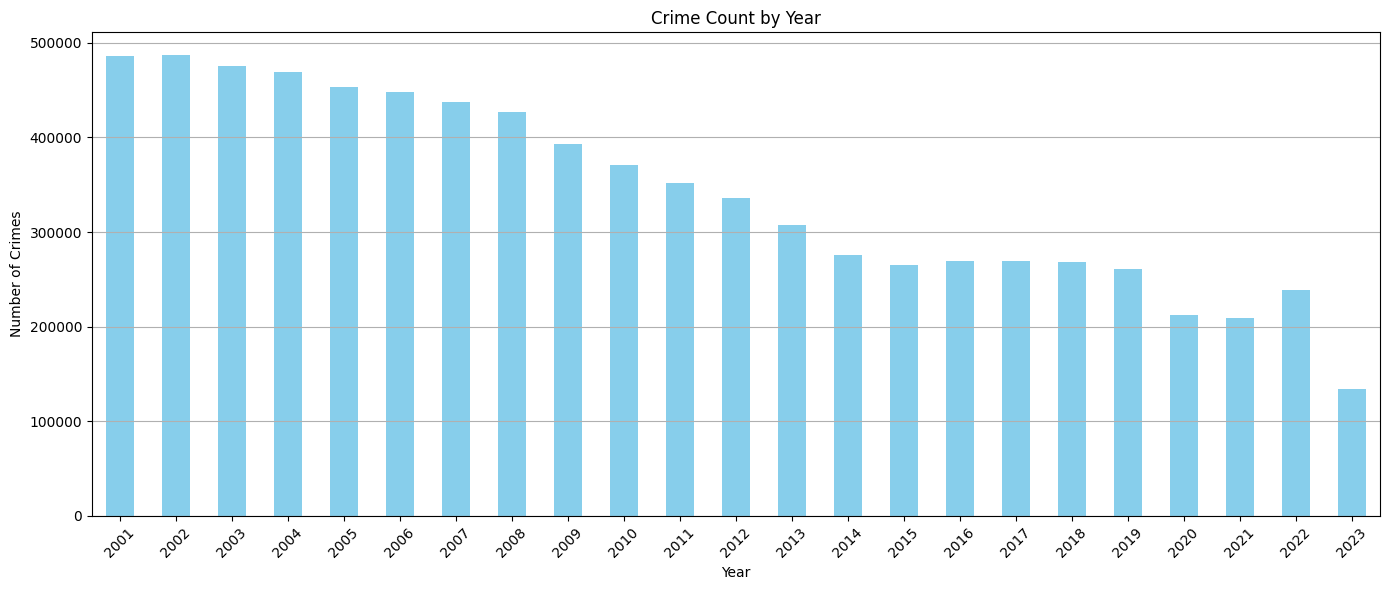

In [ ]:
df['Year'] = df['Date'].dt.year
yearly_crimes = df.groupby('Year').size()

yearly_crimes.plot(kind='bar', figsize=(14,6), color='skyblue')
plt.title("Crime Count by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


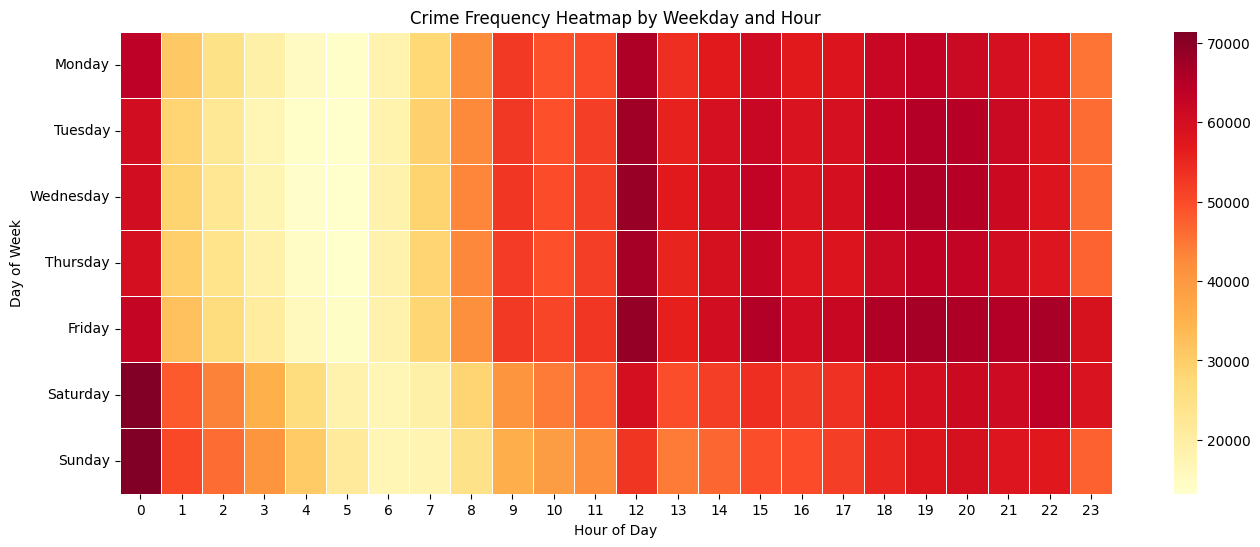

In [ ]:
import seaborn as sns

df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

pivot = df.pivot_table(index='Weekday', columns='Hour', values='ID', aggfunc='count').fillna(0)
plt.figure(figsize=(16,6))
sns.heatmap(pivot.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']],
            cmap='YlOrRd', annot=False, linewidths=.5)
plt.title("Crime Frequency Heatmap by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


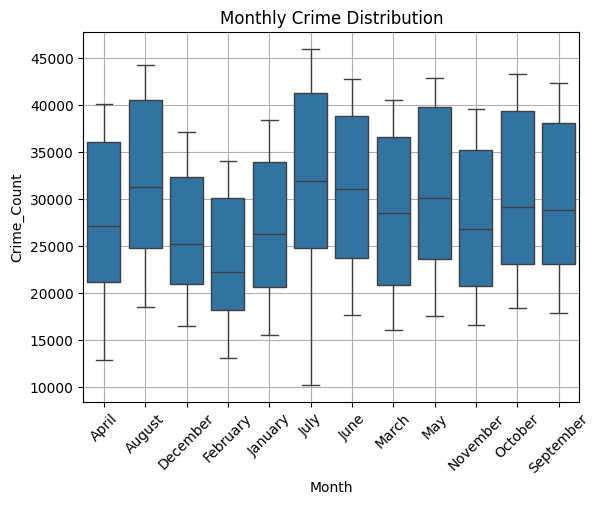

In [ ]:
df['Month'] = df['Date'].dt.month_name()
monthly_crime = df.groupby(['Year', 'Month']).size().reset_index(name='Crime_Count')

sns.boxplot(x='Month', y='Crime_Count', data=monthly_crime)
plt.title("Monthly Crime Distribution")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use your test set (e.g., y_test[:, 0] and y_pred[:, 0])
mae_lstm = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
rmse_lstm = np.sqrt(mean_squared_error(y_test[:, 0], y_pred[:, 0]))
r2_lstm = r2_score(y_test[:, 0], y_pred[:, 0])


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# If X_baseline is a 1D array like [0.51, 0.52, ...]
X_baseline_2d = np.array(X_baseline).reshape(-1, 1)
y_baseline = np.array(y_baseline)

# Train Linear Regression
lr = LinearRegression().fit(X_baseline_2d, y_baseline)

# Predict
y_pred_lr = lr.predict(X_baseline_2d)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lr = mean_absolute_error(y_baseline, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_baseline, y_pred_lr))
r2_lr = r2_score(y_baseline, y_pred_lr)


In [ ]:
metrics = {
    'Model': ['LSTM', 'Linear Regression'],
    'MAE': [mae_lstm, mae_lr],
    'RMSE': [rmse_lstm, rmse_lr],
    'R² Score': [r2_lstm, r2_lr]
}

results_df = pd.DataFrame(metrics)
print(results_df)


               Model       MAE      RMSE  R² Score
0               LSTM  0.034352  0.048245  0.399724
1  Linear Regression  0.037763  0.054380  0.892762


In [ ]:
# Convert regression predictions to categorical classes
# e.g., 0 = Low, 1 = Medium, 2 = High crime day

import numpy as np

# Convert actual and predicted values to 1D
actual_values = y_test[:, 0]
predicted_values = y_pred[:, 0]

# You can use thresholds (percentiles) to categorize
t1 = np.percentile(actual_values, 33)
t2 = np.percentile(actual_values, 66)

def to_class(val):
    if val < t1:
        return 0
    elif val < t2:
        return 1
    else:
        return 2

actual_class = [to_class(v) for v in actual_values]
predicted_class = [to_class(v) for v in predicted_values]


In [ ]:
from sklearn.metrics import fbeta_score


In [ ]:
f05 = fbeta_score(actual_class, predicted_class, beta=0.5, average='macro')
f2 = fbeta_score(actual_class, predicted_class, beta=2, average='macro')


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, fbeta_score

# Basic
print("Accuracy:", accuracy_score(actual_class, predicted_class))
print("F1-score (macro):", f1_score(actual_class, predicted_class, average='macro'))

# Advanced
f05 = fbeta_score(actual_class, predicted_class, beta=0.5, average='macro')
f2 = fbeta_score(actual_class, predicted_class, beta=2, average='macro')

print("F0.5-score:", f05)
print("F2-score:", f2)

# Classification report
print(classification_report(actual_class, predicted_class, target_names=['Low', 'Medium', 'High']))


Accuracy: 0.5832824893227577
F1-score (macro): 0.5493414640261771
F0.5-score: 0.5867339624794917
F2-score: 0.5588647753861117
              precision    recall  f1-score   support

         Low       0.96      0.22      0.36       538
      Medium       0.43      0.66      0.52       540
        High       0.69      0.86      0.77       561

    accuracy                           0.58      1639
   macro avg       0.70      0.58      0.55      1639
weighted avg       0.70      0.58      0.55      1639



In [ ]:
print(classification_report(actual_class, predicted_class, target_names=['Low', 'Medium', 'High']))


              precision    recall  f1-score   support

         Low       0.96      0.22      0.36       538
      Medium       0.43      0.66      0.52       540
        High       0.69      0.86      0.77       561

    accuracy                           0.58      1639
   macro avg       0.70      0.58      0.55      1639
weighted avg       0.70      0.58      0.55      1639



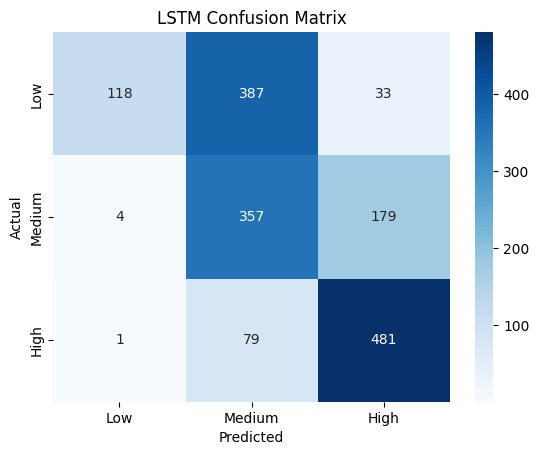

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(actual_class, predicted_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.show()


In [ ]:
# Define your hyperparameter options
param_grid = {
    'units': [32, 64, 128],
    'dropout': [0.2, 0.3, 0.5],
    'batch_size': [32, 64],
    'sequence_length': [14, 30, 60]
}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np

def build_and_train(X, y, units, dropout, batch_size, epochs=10):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(X.shape[1], 1)),
        Dropout(dropout),
        LSTM(units//2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    preds = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, preds))
    return rmse


In [ ]:
# Load your dataset if not loaded
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/Crimes_-_2001_to_Present.csv')  # adjust path if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Aggregate crimes per day
daily_crimes = df.groupby(df['Date'].dt.date).size().reset_index(name='Crime Count')
daily_crimes = daily_crimes.sort_values('Date')

# Normalize crime count
scaler = MinMaxScaler()
crime_scaled = scaler.fit_transform(daily_crimes[['Crime Count']].values.reshape(-1, 1))


<ipython-input-7-c98ce1c38ce6>:5: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Crimes_-_2001_to_Present.csv')  # adjust path if needed
<ipython-input-7-c98ce1c38ce6>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
import itertools

# Store best results
best_rmse = float('inf')
best_params = {}

# Test all combinations
for units, dropout, batch_size, seq_len in itertools.product(param_grid['units'],
                                                              param_grid['dropout'],
                                                              param_grid['batch_size'],
                                                              param_grid['sequence_length']):
    # Re-create sequences for each sequence length
    def create_sequences(data, time_steps=seq_len):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:i+time_steps])
            y.append(data[i + time_steps])
        return np.array(X), np.array(y)

    X_seq, y_seq = create_sequences(crime_scaled)  # crime_scaled is your normalized daily count
    X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

    rmse = build_and_train(X_seq, y_seq, units, dropout, batch_size)

    print(f"Params: units={units}, dropout={dropout}, batch_size={batch_size}, seq_len={seq_len} ➔ RMSE: {rmse:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {'units': units, 'dropout': dropout, 'batch_size': batch_size, 'sequence_length': seq_len}

print("\nBest Parameters Found:", best_params)
print(f"Best RMSE: {best_rmse:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Params: units=32, dropout=0.2, batch_size=32, seq_len=14 ➔ RMSE: 0.0166


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=32, dropout=0.2, batch_size=32, seq_len=30 ➔ RMSE: 0.0171


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Params: units=32, dropout=0.2, batch_size=32, seq_len=60 ➔ RMSE: 0.0176


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=32, dropout=0.2, batch_size=64, seq_len=14 ➔ RMSE: 0.0186


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=32, dropout=0.2, batch_size=64, seq_len=30 ➔ RMSE: 0.0189


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
Params: units=32, dropout=0.2, batch_size=64, seq_len=60 ➔ RMSE: 0.0186


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Params: units=32, dropout=0.3, batch_size=32, seq_len=14 ➔ RMSE: 0.0170


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=32, dropout=0.3, batch_size=32, seq_len=30 ➔ RMSE: 0.0178


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
Params: units=32, dropout=0.3, batch_size=32, seq_len=60 ➔ RMSE: 0.0181


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=32, dropout=0.3, batch_size=64, seq_len=14 ➔ RMSE: 0.0190


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=32, dropout=0.3, batch_size=64, seq_len=30 ➔ RMSE: 0.0198


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Params: units=32, dropout=0.3, batch_size=64, seq_len=60 ➔ RMSE: 0.0188


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Params: units=32, dropout=0.5, batch_size=32, seq_len=14 ➔ RMSE: 0.0190


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Params: units=32, dropout=0.5, batch_size=32, seq_len=30 ➔ RMSE: 0.0185


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Params: units=32, dropout=0.5, batch_size=32, seq_len=60 ➔ RMSE: 0.0182


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=32, dropout=0.5, batch_size=64, seq_len=14 ➔ RMSE: 0.0198


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=32, dropout=0.5, batch_size=64, seq_len=30 ➔ RMSE: 0.0192


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Params: units=32, dropout=0.5, batch_size=64, seq_len=60 ➔ RMSE: 0.0193


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=64, dropout=0.2, batch_size=32, seq_len=14 ➔ RMSE: 0.0155


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Params: units=64, dropout=0.2, batch_size=32, seq_len=30 ➔ RMSE: 0.0158


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
Params: units=64, dropout=0.2, batch_size=32, seq_len=60 ➔ RMSE: 0.0163


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=64, dropout=0.2, batch_size=64, seq_len=14 ➔ RMSE: 0.0171


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Params: units=64, dropout=0.2, batch_size=64, seq_len=30 ➔ RMSE: 0.0162


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
Params: units=64, dropout=0.2, batch_size=64, seq_len=60 ➔ RMSE: 0.0161


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=64, dropout=0.3, batch_size=32, seq_len=14 ➔ RMSE: 0.0165


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Params: units=64, dropout=0.3, batch_size=32, seq_len=30 ➔ RMSE: 0.0186


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step
Params: units=64, dropout=0.3, batch_size=32, seq_len=60 ➔ RMSE: 0.0165


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Params: units=64, dropout=0.3, batch_size=64, seq_len=14 ➔ RMSE: 0.0166


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=64, dropout=0.3, batch_size=64, seq_len=30 ➔ RMSE: 0.0175


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
Params: units=64, dropout=0.3, batch_size=64, seq_len=60 ➔ RMSE: 0.0183


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Params: units=64, dropout=0.5, batch_size=32, seq_len=14 ➔ RMSE: 0.0175


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=64, dropout=0.5, batch_size=32, seq_len=30 ➔ RMSE: 0.0162


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step
Params: units=64, dropout=0.5, batch_size=32, seq_len=60 ➔ RMSE: 0.0166


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=64, dropout=0.5, batch_size=64, seq_len=14 ➔ RMSE: 0.0166


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=64, dropout=0.5, batch_size=64, seq_len=30 ➔ RMSE: 0.0186


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Params: units=64, dropout=0.5, batch_size=64, seq_len=60 ➔ RMSE: 0.0181


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Params: units=128, dropout=0.2, batch_size=32, seq_len=14 ➔ RMSE: 0.0175


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
Params: units=128, dropout=0.2, batch_size=32, seq_len=30 ➔ RMSE: 0.0160


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step
Params: units=128, dropout=0.2, batch_size=32, seq_len=60 ➔ RMSE: 0.0159


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
Params: units=128, dropout=0.2, batch_size=64, seq_len=14 ➔ RMSE: 0.0165


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
Params: units=128, dropout=0.2, batch_size=64, seq_len=30 ➔ RMSE: 0.0182


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step
Params: units=128, dropout=0.2, batch_size=64, seq_len=60 ➔ RMSE: 0.0157


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Params: units=128, dropout=0.3, batch_size=32, seq_len=14 ➔ RMSE: 0.0157


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step
Params: units=128, dropout=0.3, batch_size=32, seq_len=30 ➔ RMSE: 0.0165


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step
Params: units=128, dropout=0.3, batch_size=32, seq_len=60 ➔ RMSE: 0.0165


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Params: units=128, dropout=0.3, batch_size=64, seq_len=14 ➔ RMSE: 0.0174


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
Params: units=128, dropout=0.3, batch_size=64, seq_len=30 ➔ RMSE: 0.0161


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step
Params: units=128, dropout=0.3, batch_size=64, seq_len=60 ➔ RMSE: 0.0157


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Params: units=128, dropout=0.5, batch_size=32, seq_len=14 ➔ RMSE: 0.0154


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step
Params: units=128, dropout=0.5, batch_size=32, seq_len=30 ➔ RMSE: 0.0179


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step
Params: units=128, dropout=0.5, batch_size=32, seq_len=60 ➔ RMSE: 0.0168


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Params: units=128, dropout=0.5, batch_size=64, seq_len=14 ➔ RMSE: 0.0160


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


212/212 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Params: units=128, dropout=0.5, batch_size=64, seq_len=30 ➔ RMSE: 0.0158


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step
Params: units=128, dropout=0.5, batch_size=64, seq_len=60 ➔ RMSE: 0.0167

Best Parameters Found: {'units': 128, 'dropout': 0.5, 'batch_size': 32, 'sequence_length': 14}
Best RMSE: 0.0154


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset (adjust filename if needed)
df = pd.read_csv('/content/Crimes_-_2001_to_Present.csv', low_memory=False)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Aggregate daily crime counts
daily_crimes = df.groupby(df['Date'].dt.date).size().reset_index(name='Crime Count')
daily_crimes = daily_crimes.sort_values('Date')

# Normalize the crime counts
scaler = MinMaxScaler()
crime_scaled = scaler.fit_transform(daily_crimes[['Crime Count']].values.reshape(-1, 1))


<ipython-input-8-030acf7e7d0f>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np

# Define your hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'dropout': [0.2, 0.3, 0.5],
    'batch_size': [32, 64],
    'sequence_length': [14, 30, 60]
}

# Function to create sequences
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Function to build and train LSTM
def build_and_train(X, y, units, dropout, batch_size, epochs=10):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(X.shape[1], 1)),
        Dropout(dropout),
        LSTM(units//2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    preds = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, preds))
    return rmse

# Start Grid Search
best_rmse = float('inf')
best_params = {}

for units, dropout, batch_size, seq_len in itertools.product(param_grid['units'],
                                                              param_grid['dropout'],
                                                              param_grid['batch_size'],
                                                              param_grid['sequence_length']):
    X_seq, y_seq = create_sequences(crime_scaled, time_steps=seq_len)
    X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

    rmse = build_and_train(X_seq, y_seq, units, dropout, batch_size)

    print(f"Params: units={units}, dropout={dropout}, batch_size={batch_size}, seq_len={seq_len} ➔ RMSE: {rmse:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {'units': units, 'dropout': dropout, 'batch_size': batch_size, 'sequence_length': seq_len}

print("\nBest Parameters Found:", best_params)
print(f"Best RMSE: {best_rmse:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Params: units=32, dropout=0.2, batch_size=32, seq_len=14 ➔ RMSE: 0.0539


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=32, dropout=0.2, batch_size=32, seq_len=30 ➔ RMSE: 0.0529


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Params: units=32, dropout=0.2, batch_size=32, seq_len=60 ➔ RMSE: 0.0526


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Params: units=32, dropout=0.2, batch_size=64, seq_len=14 ➔ RMSE: 0.0549


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Params: units=32, dropout=0.2, batch_size=64, seq_len=30 ➔ RMSE: 0.0551


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Params: units=32, dropout=0.2, batch_size=64, seq_len=60 ➔ RMSE: 0.0545


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Params: units=32, dropout=0.3, batch_size=32, seq_len=14 ➔ RMSE: 0.0543


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Params: units=32, dropout=0.3, batch_size=32, seq_len=30 ➔ RMSE: 0.0533


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Params: units=32, dropout=0.3, batch_size=32, seq_len=60 ➔ RMSE: 0.0530


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=32, dropout=0.3, batch_size=64, seq_len=14 ➔ RMSE: 0.0540


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=32, dropout=0.3, batch_size=64, seq_len=30 ➔ RMSE: 0.0543


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Params: units=32, dropout=0.3, batch_size=64, seq_len=60 ➔ RMSE: 0.0547


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Params: units=32, dropout=0.5, batch_size=32, seq_len=14 ➔ RMSE: 0.0534


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=32, dropout=0.5, batch_size=32, seq_len=30 ➔ RMSE: 0.0533


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Params: units=32, dropout=0.5, batch_size=32, seq_len=60 ➔ RMSE: 0.0534


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Params: units=32, dropout=0.5, batch_size=64, seq_len=14 ➔ RMSE: 0.0562


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=32, dropout=0.5, batch_size=64, seq_len=30 ➔ RMSE: 0.0552


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Params: units=32, dropout=0.5, batch_size=64, seq_len=60 ➔ RMSE: 0.0539


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Params: units=64, dropout=0.2, batch_size=32, seq_len=14 ➔ RMSE: 0.0529


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Params: units=64, dropout=0.2, batch_size=32, seq_len=30 ➔ RMSE: 0.0534


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
Params: units=64, dropout=0.2, batch_size=32, seq_len=60 ➔ RMSE: 0.0528


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=64, dropout=0.2, batch_size=64, seq_len=14 ➔ RMSE: 0.0536


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Params: units=64, dropout=0.2, batch_size=64, seq_len=30 ➔ RMSE: 0.0529


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
Params: units=64, dropout=0.2, batch_size=64, seq_len=60 ➔ RMSE: 0.0541


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=64, dropout=0.3, batch_size=32, seq_len=14 ➔ RMSE: 0.0533


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Params: units=64, dropout=0.3, batch_size=32, seq_len=30 ➔ RMSE: 0.0522


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Params: units=64, dropout=0.3, batch_size=32, seq_len=60 ➔ RMSE: 0.0524


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=64, dropout=0.3, batch_size=64, seq_len=14 ➔ RMSE: 0.0550


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Params: units=64, dropout=0.3, batch_size=64, seq_len=30 ➔ RMSE: 0.0535


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
Params: units=64, dropout=0.3, batch_size=64, seq_len=60 ➔ RMSE: 0.0532


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Params: units=64, dropout=0.5, batch_size=32, seq_len=14 ➔ RMSE: 0.0536


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=64, dropout=0.5, batch_size=32, seq_len=30 ➔ RMSE: 0.0535


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
Params: units=64, dropout=0.5, batch_size=32, seq_len=60 ➔ RMSE: 0.0528


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Params: units=64, dropout=0.5, batch_size=64, seq_len=14 ➔ RMSE: 0.0559


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Params: units=64, dropout=0.5, batch_size=64, seq_len=30 ➔ RMSE: 0.0556


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Params: units=64, dropout=0.5, batch_size=64, seq_len=60 ➔ RMSE: 0.0538


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Params: units=128, dropout=0.2, batch_size=32, seq_len=14 ➔ RMSE: 0.0551


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step
Params: units=128, dropout=0.2, batch_size=32, seq_len=30 ➔ RMSE: 0.0522


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step
Params: units=128, dropout=0.2, batch_size=32, seq_len=60 ➔ RMSE: 0.0520


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=128, dropout=0.2, batch_size=64, seq_len=14 ➔ RMSE: 0.0564


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step
Params: units=128, dropout=0.2, batch_size=64, seq_len=30 ➔ RMSE: 0.0706


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step
Params: units=128, dropout=0.2, batch_size=64, seq_len=60 ➔ RMSE: 0.0564


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Params: units=128, dropout=0.3, batch_size=32, seq_len=14 ➔ RMSE: 0.0517


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step
Params: units=128, dropout=0.3, batch_size=32, seq_len=30 ➔ RMSE: 0.0517


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step
Params: units=128, dropout=0.3, batch_size=32, seq_len=60 ➔ RMSE: 0.0515


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
Params: units=128, dropout=0.3, batch_size=64, seq_len=14 ➔ RMSE: 0.0537


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step
Params: units=128, dropout=0.3, batch_size=64, seq_len=30 ➔ RMSE: 0.0528


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step
Params: units=128, dropout=0.3, batch_size=64, seq_len=60 ➔ RMSE: 0.0525


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Params: units=128, dropout=0.5, batch_size=32, seq_len=14 ➔ RMSE: 0.0522


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
Params: units=128, dropout=0.5, batch_size=32, seq_len=30 ➔ RMSE: 0.0530


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step
Params: units=128, dropout=0.5, batch_size=32, seq_len=60 ➔ RMSE: 0.0585


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Params: units=128, dropout=0.5, batch_size=64, seq_len=14 ➔ RMSE: 0.0547


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
Params: units=128, dropout=0.5, batch_size=64, seq_len=30 ➔ RMSE: 0.0528


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step
Params: units=128, dropout=0.5, batch_size=64, seq_len=60 ➔ RMSE: 0.0534

Best Parameters Found: {'units': 128, 'dropout': 0.3, 'batch_size': 32, 'sequence_length': 60}
Best RMSE: 0.0515


In [ ]:
# Final Model based on best params
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Prepare sequences again with best sequence length
def create_final_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

X_final, y_final = create_final_sequences(crime_scaled)
X_final = X_final.reshape((X_final.shape[0], X_final.shape[1], 1))

# Build the model
final_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(60, 1)),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

final_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the final model
history = final_model.fit(X_final, y_final, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


205/205 ━━━━━━━━━━━━━━━━━━━━ 34s 141ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 138ms/step - loss: 9.7029e-04 - val_loss: 9.4089e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - loss: 0.0012 - val_loss: 8.9163e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - loss: 0.0011 - val_loss: 8.4098e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - loss: 0.0011 - val_loss: 9.4600e-04
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - loss: 8.5965e-04 - val_loss: 9.6892e-04
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 28s 139ms/step - loss: 9.0473e-04 - val_loss: 7.8223e-04
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - loss: 8.2401e-04 - val_loss: 7.7629e-04
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 29s 141ms/step - loss: 8.6521e-04 -

# **Evaluate Final Metrics (RMSE, MAE, R²)**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on full dataset
y_pred = final_model.predict(X_final)

# Metrics
final_rmse = np.sqrt(mean_squared_error(y_final, y_pred))
final_mae = mean_absolute_error(y_final, y_pred)
final_r2 = r2_score(y_final, y_pred)

print(f"Final RMSE: {final_rmse:.4f}")
print(f"Final MAE: {final_mae:.4f}")
print(f"Final R² Score: {final_r2:.4f}")


256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step
Final RMSE: 0.0292
Final MAE: 0.0119
Final R² Score: 0.9785


# **2. Plot Learning Curves**

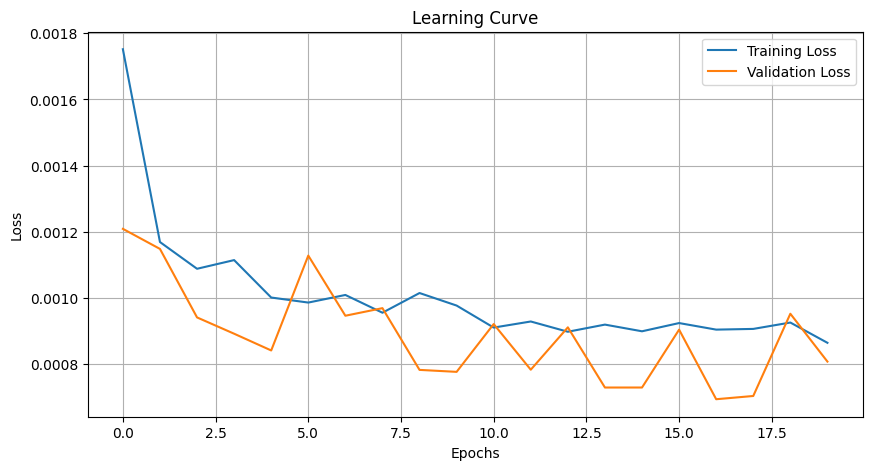

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# **3. Plot Actual vs Predicted Crime Count (Scaled)**

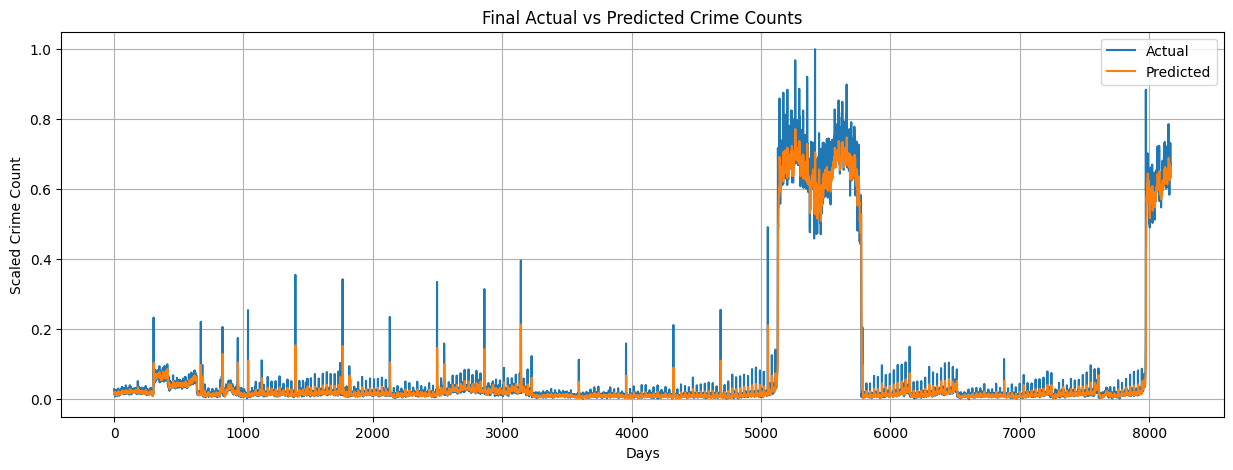

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_final, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Final Actual vs Predicted Crime Counts')
plt.xlabel('Days')
plt.ylabel('Scaled Crime Count')
plt.legend()
plt.grid(True)
plt.show()


# **Simple CNN-LSTM Hybrid Code**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense

# Build CNN-LSTM Model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(60, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history_cnn_lstm = cnn_lstm_model.fit(X_final, y_final, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 84ms/step - loss: 0.0011 - val_loss: 8.4478e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - loss: 9.7423e-04 - val_loss: 0.0011
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - loss: 0.0010 - val_loss: 8.3845e-04
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - loss: 0.0012 - val_loss: 7.8056e-04
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - loss: 7.6748e-04 - val_loss: 7.6034e-04
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - loss: 9.5795e-04 - val_loss: 7.4523e-04
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - loss: 8.1211e-04 - val_loss: 

In [ ]:
# Predict
y_pred_cnn_lstm = cnn_lstm_model.predict(X_final)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

final_rmse_cnn_lstm = np.sqrt(mean_squared_error(y_final, y_pred_cnn_lstm))
final_mae_cnn_lstm = mean_absolute_error(y_final, y_pred_cnn_lstm)
final_r2_cnn_lstm = r2_score(y_final, y_pred_cnn_lstm)

print(f"Final CNN-LSTM RMSE: {final_rmse_cnn_lstm:.4f}")
print(f"Final CNN-LSTM MAE: {final_mae_cnn_lstm:.4f}")
print(f"Final CNN-LSTM R² Score: {final_r2_cnn_lstm:.4f}")


256/256 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
Final CNN-LSTM RMSE: 0.0281
Final CNN-LSTM MAE: 0.0122
Final CNN-LSTM R² Score: 0.9802


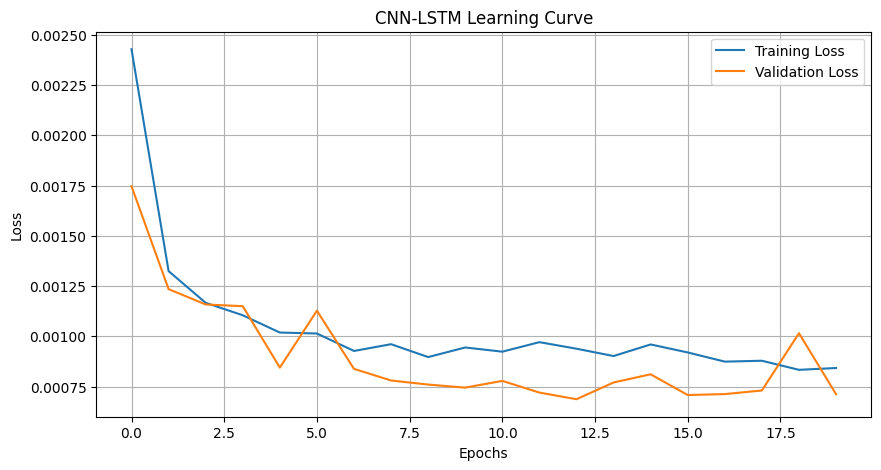

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history_cnn_lstm.history['loss'], label='Training Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


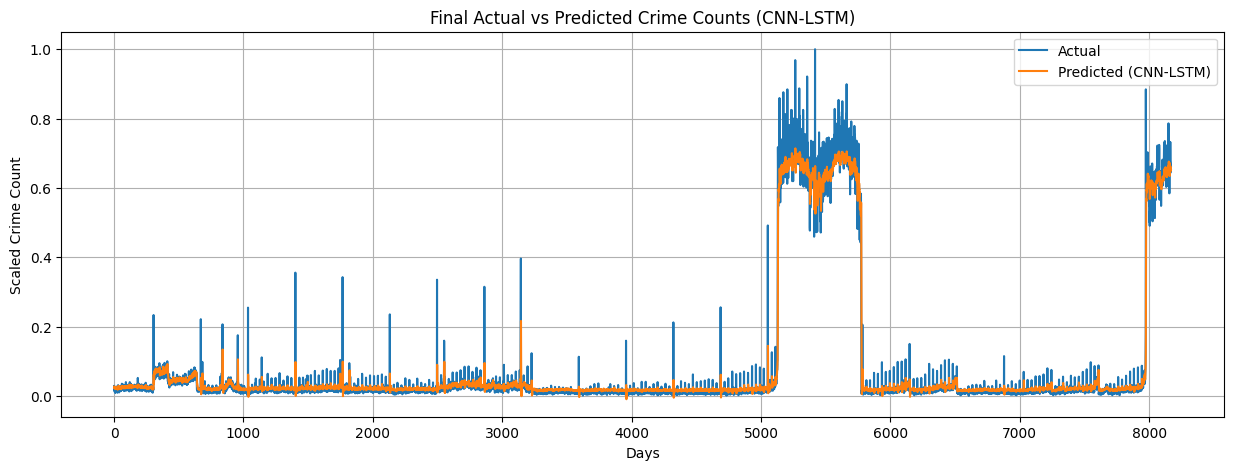

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_final, label='Actual')
plt.plot(y_pred_cnn_lstm, label='Predicted (CNN-LSTM)')
plt.title('Final Actual vs Predicted Crime Counts (CNN-LSTM)')
plt.xlabel('Days')
plt.ylabel('Scaled Crime Count')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset (adjust filename if needed)
df = pd.read_csv('/content/Crimes_-_2001_to_Present.csv')  # Adjust the file path if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

# Aggregate daily crime counts
daily_crimes = df.groupby(df['Date'].dt.date).size().reset_index(name='Crime Count')
daily_crimes = daily_crimes.sort_values('Date')

# Normalize the crime counts
scaler = MinMaxScaler()
crime_scaled = scaler.fit_transform(daily_crimes[['Crime Count']].values.reshape(-1, 1))


<ipython-input-5-0979baea27dd>:5: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Crimes_-_2001_to_Present.csv')  # Adjust the file path if needed
<ipython-input-5-0979baea27dd>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
# Create shorter sequences (14 days)
import numpy as np

def create_short_sequences(data, time_steps=14):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

X_short, y_short = create_short_sequences(crime_scaled)
X_short = X_short.reshape((X_short.shape[0], X_short.shape[1], 1))

# Build a simple LSTM again
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

short_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(14, 1)),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

short_model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history_short = short_model.fit(X_short, y_short, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
y_pred_short = short_model.predict(X_short)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_short = np.sqrt(mean_squared_error(y_short, y_pred_short))
mae_short = mean_absolute_error(y_short, y_pred_short)
r2_short = r2_score(y_short, y_pred_short)

print(f"Ablation RMSE (14-day input): {rmse_short:.4f}")
print(f"Ablation MAE (14-day input): {mae_short:.4f}")
print(f"Ablation R² Score (14-day input): {r2_short:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


206/206 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0052 - val_loss: 0.0011
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0015 - val_loss: 9.1876e-04
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 9.1934e-04 - val_loss: 8.7832e-04
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0011 - val_loss: 8.1163e-04
Epoch 5/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0010 - val_loss: 7.5442e-04
Epoch 6/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0013 - val_loss: 7.3732e-04
Epoch 7/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0010 - val_loss: 7.4505e-04
Epoch 8/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0012 - val_loss: 7.2678e-04
Epoch 9/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0011 - val_loss: 8.0018e-04
Epoch 10/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0011 - val_loss: 7.1376e-04
Epoch 11/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0010 - val_loss: 6.8838e-04
Ep